In [1]:
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.DataFrame()

In [3]:
tickers = ['PG', '^GSPC']

In [4]:
for t in tickers:
    df[t] = web.DataReader(t, 'yahoo', '2010-1-1', '2017-12-30')['Adj Close']

In [5]:
df.tail()

,PG,^GSPC
Date,,
2017-12-22,87.111641,2683.340088
2017-12-26,87.442574,2680.500000
2017-12-27,87.083275,2682.620117
2017-12-28,87.054901,2687.540039
2017-12-29,86.875252,2673.610107


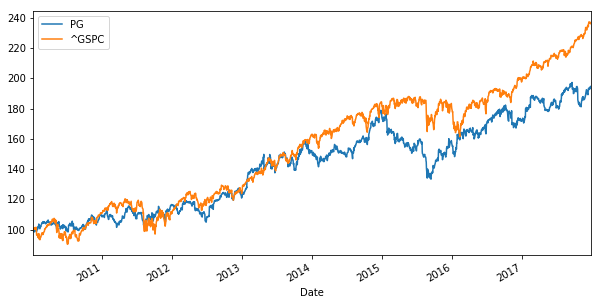

In [6]:
(df / df.iloc[0] * 100).plot(figsize=(10,5))

In [7]:
log_returns = np.log(df / df.shift(1))

In [8]:
log_returns.mean() * 250

PG       0.082009
^GSPC    0.106681
dtype: float64

In [9]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.019182,0.011416
^GSPC,0.011416,0.021570


In [10]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.561254
^GSPC,0.561254,1.000000


In [11]:
num_assets = len(tickers)

In [12]:
p_returns = []
p_vol = []

for i in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    p_returns.append(np.sum(weights * log_returns.mean()) * 250)
    p_vol.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))

In [13]:
p_returns = np.array(p_returns)
p_vol = np.array(p_vol)

In [14]:
portfolios = pd.DataFrame({'Return': p_returns, 'Volatility': p_vol})

Text(0, 0.5, 'Expected Returns')

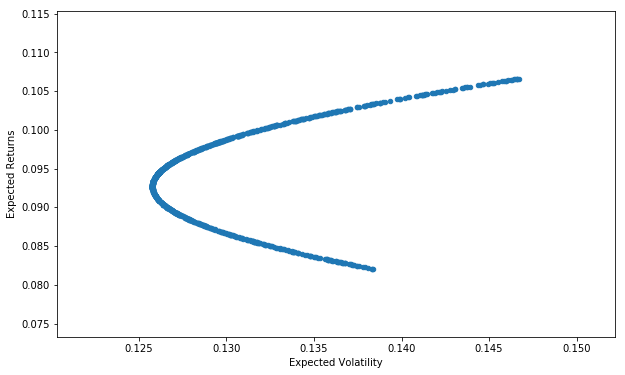

In [15]:
portfolios.plot(y='Return', x='Volatility', kind='scatter', figsize=(10, 6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Returns')